<a href="https://colab.research.google.com/github/Ayush-Tibrewal/CongnitiveLoad-Detection/blob/main/DEEPLEARNING_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sam40/final_datset_Sam40_Mat/Combined_Data.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,target
0,86.193026,-273.187031,-402.933805,-271.556521,111.434735,19.893705,13.963880,20.593680,13.259276,-2.044488,...,11.418089,-3.978692,-1.986124,12.908904,23.449082,30.991623,111.401968,-28.657760,-901.189762,1
1,89.063580,-287.814680,-420.139618,-285.146547,109.713191,18.746734,15.223366,19.621657,14.021797,4.046700,...,17.788561,6.461726,6.490896,16.848083,21.888709,28.355180,108.875399,-35.728222,-932.454164,1
2,89.201398,-303.291316,-441.412067,-303.289853,103.470425,17.820471,15.398429,17.142959,8.357753,5.374654,...,17.756136,9.426649,9.060580,18.587718,16.831567,20.744673,102.867666,-43.201459,-963.328677,1
3,81.039690,-323.465688,-463.277986,-320.902688,93.062249,8.449375,6.922635,13.612849,8.203022,5.691301,...,10.741721,1.352036,0.386200,9.684251,9.159395,10.829071,92.913853,-57.254038,-993.806401,1
4,72.856871,-345.039721,-485.297702,-338.776031,81.888704,-2.785932,-1.910618,6.529390,0.129632,-1.984368,...,-1.418033,-9.495602,-10.387285,-0.586225,0.367818,3.397099,81.652636,-75.025094,-1025.241719,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767995,56.061226,1.095232,-40.361645,-49.821895,20.361038,36.595114,42.130895,34.072405,22.995367,39.733039,...,63.415637,32.631686,19.291332,24.792207,49.525512,52.438065,39.838590,-31.706655,-236.363093,0
767996,59.920657,2.338317,-35.271389,-42.921786,26.795754,39.764102,46.348238,39.161411,24.421472,37.922187,...,57.204530,27.022219,18.130326,28.221834,49.900470,54.800792,42.638400,-30.664968,-231.896530,0
767997,58.243311,1.121077,-33.669922,-44.825635,21.982541,34.937921,44.925978,38.697766,27.353797,39.362638,...,55.346929,25.619285,16.707009,24.461084,46.996285,53.428630,45.493959,-27.443361,-229.644680,0
767998,55.755265,-1.968532,-41.042760,-58.335007,11.641217,27.306190,40.109270,30.388959,22.803499,36.205517,...,56.579670,24.759334,14.128763,17.088666,42.880100,48.793705,41.130443,-32.904927,-237.904702,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(new_data)
# scaled_data = scaler.transform(new_data)

In [ ]:
data=new_data[new_data['target'].isin([0, 1])]

In [ ]:
data.value_counts("target").sort_index()

target
0    384000
1    384000
dtype: int64

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,target
count,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,...,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.000000,768000.0
mean,17.566366,-73.557930,-117.213434,-87.079704,12.536379,2.949311,3.372704,2.568107,1.192760,0.714472,...,-1.085678,-7.571167,-8.723310,-4.861284,0.659182,1.411599,7.380761,-34.162400,-207.644771,0.5
std,61.537240,111.361571,161.131071,132.713303,63.393722,50.436677,41.908107,44.271741,55.818904,66.946639,...,43.536809,49.157019,50.249944,45.940123,42.647263,45.382092,54.077567,77.136676,283.973771,0.5
min,-2149.678429,-836.086013,-1179.599234,-1437.635915,-982.947377,-692.201662,-348.082228,-357.063940,-376.192656,-796.167504,...,-397.124628,-557.648428,-622.475050,-410.595533,-346.073598,-544.989264,-406.004218,-809.271165,-2090.965625,0.0
25%,-6.288355,-111.355532,-169.045075,-129.097940,-10.579778,-15.333970,-13.873724,-13.759801,-16.379182,-15.372287,...,-18.573758,-27.243921,-29.155455,-24.059236,-17.145982,-17.275953,-18.562446,-66.814519,-277.387060,0.0
50%,14.366872,-47.012641,-71.415782,-53.310207,8.962919,0.699689,0.869048,0.422737,-0.698854,-0.651308,...,-0.751424,-4.415155,-5.275972,-3.305618,0.517567,0.623032,5.900683,-25.448190,-116.136188,0.5
75%,39.593422,-8.071503,-17.545950,-11.227932,33.191179,18.326994,17.374454,16.092505,15.637514,14.526686,...,16.861846,15.495719,15.598152,16.420046,18.943207,19.486546,32.683828,5.694108,-39.018514,1.0
max,1414.099015,805.090362,628.259883,744.940171,964.235452,731.191059,692.594915,638.587792,1477.826237,2111.814480,...,750.319784,676.140834,673.961255,669.865123,695.959386,690.463731,726.657705,743.536401,1882.965353,1.0


In [ ]:
import numpy as np

def create_eeg_epochs(data, labels, epoch_size, overlap):
    epochs = []
    labels_epoch = []
    step_size = int(epoch_size * (1 - overlap))

    for i in range(0, len(data) - epoch_size + 1, step_size):
        epoch_data = data.iloc[i:i + epoch_size, :-1]  # Exclude the label column
        epoch_label = int(labels.iloc[i + epoch_size - 1])  # Assuming label is in the last row of each epoch
        epochs.append(epoch_data.values)
        labels_epoch.append(epoch_label)

    return np.array(epochs), np.array(labels_epoch)


In [ ]:
epoch_size = 128  # Adjust according to your desired epoch size
overlap = 1  # Adjust as needed

eeg_epochs, epoch_labels = create_eeg_epochs(data, data['label'], epoch_size, overlap)

eeg_epochs.shape


In [ ]:
# Train test split
X = data.loc[:, data.columns != "target"].to_numpy()
y = data.loc[:, "target"].to_numpy()
# print(X_train_re.shape)
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# X_train_re = X.reshape(-1,128,32)
# y_train_re= y.reshape(-1,128)
# result=y_train_re.mean(axis=1)
# # split data
#X_train, X_test, y_train, y_test = train_test_split(X_train_re, result, test_size=0.2, stratify=y_train_re, random_state=42)


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape[0] / X_test.shape[0]) #  train/test ratio

(614400, 32)
(153600, 32)
(614400,)
(153600,)
4.0


In [ ]:
train_unique, train_counts = np.unique(y_train, return_counts=True)
print(train_unique)
print(train_counts)
print(train_counts[1]/train_counts[0])

[0 1]
[307200 307200]
1.0


In [ ]:
test_unique, test_counts = np.unique(y_test, return_counts=True)
print(test_unique)
print(test_counts)
print(test_counts[1]/test_counts[0])

[0 1]
[76800 76800]
1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, Dropout, Flatten, MaxPooling1D, AveragePooling1D, ReLU, Softmax, GlobalAveragePooling1D, Add
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import plot_model


In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


# ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.regularizers import L2
import matplotlib.pyplot as plt

# Define your simple ANN model
def create_simple_ANN_model():
    input_layer = Input(shape=(21))
    dense_1 = Dense(64, activation=ReLU(), kernel_regularizer=L2())(input_layer)
    dense_2 = Dense(32, activation=ReLU(), kernel_regularizer=L2())(dense_1)
    output_layer = Dense(1, activation="sigmoid", kernel_regularizer=L2())(dense_2)
    return Model(inputs=input_layer, outputs=output_layer)

# Create the model
simple_ann_model = create_simple_ANN_model()

# Compile the model
simple_ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()]
)

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Train the model with callbacks
simple_ANN_history = simple_ann_model.fit(
    x=X_train, y=y_train,
    batch_size=1000, epochs=50,
    verbose=1, validation_data=(X_test, y_test),
    shuffle=True, callbacks=callbacks
)

# Plot training and validation curves
plt.plot(simple_ANN_history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(simple_ANN_history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(simple_ANN_history.history['loss'], label='Training Loss')
plt.plot(simple_ANN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print test data metrics
test_metrics = simple_ann_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_metrics[1]:.4f}')
print(f'Test AUC: {test_metrics[2]:.4f}')
print(f'Test Loss: {test_metrics[0]:.4f}')


# 1DCNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, ReLU, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to create a simple CNN model
def create_simple_CNN_model():
    input_layer = Input(shape=(14, 1))  # Adjusted input shape

    conv_1 = Conv1D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
    relu_1 = ReLU()(conv_1)
    maxpool_1 = MaxPooling1D(pool_size=2, strides=None, padding='valid')(relu_1)

    flatten = Flatten()(maxpool_1)
    dense_1 = Dense(64, activation=ReLU(), kernel_regularizer=L2())(flatten)
    output_layer = Dense(1, activation="sigmoid", kernel_regularizer=L2())(dense_1)

    return Model(inputs=input_layer, outputs=output_layer)

# Create the model with input size (32, 1)
simple_cnn_model = create_simple_CNN_model()
simple_cnn_model.summary()

# Compile the model
simple_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                         loss=tf.keras.losses.BinaryCrossentropy(),
                         metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
simple_cnn_history = simple_cnn_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, verbose=1,
                                          validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(simple_cnn_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = simple_cnn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = simple_cnn_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined before this point

def create_vgg16_model():
    # input
    input_layer = Input(shape=(32,1))

    # 1st Conv Block
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 2nd Conv Block
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 3rd Conv block
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 4th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 5th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dense(units=4096, activation='relu')(x)
    output_layer = Dense(units=1, activation='sigmoid')(x)  # Changed activation to 'sigmoid'

    return Model(inputs=input_layer, outputs=output_layer)

# Assuming X_train, y_train, X_test, y_test are defined before this point

# Create the model with input size (32, 1)
vgg16_model = create_vgg16_model()
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Assuming X_train, y_train, X_test, y_test are defined before this point

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, verbose=1,
                                validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 16, 128)           49280     
                                                             

4800/4800 [==============================] - 17s 4ms/step
Testing Accuracy: 0.9873632788658142
F1 Score: 0.9873747064830655
Precision: 0.9864827980608014
Recall: 0.9882682291666667


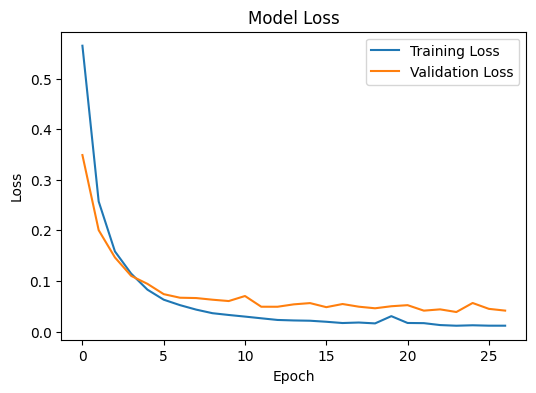

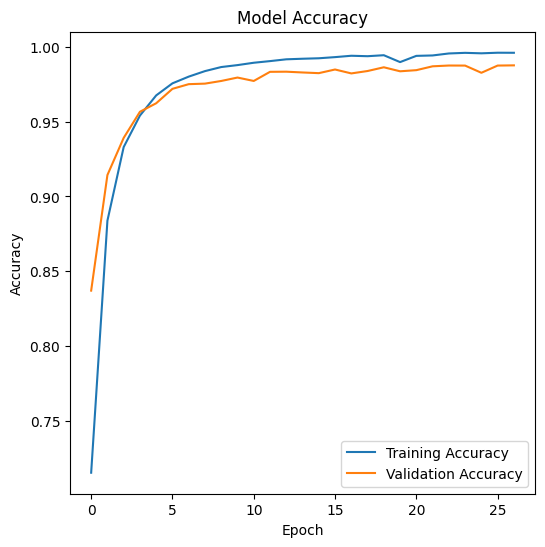

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     76800
           1       0.99      0.99      0.99     76800

    accuracy                           0.99    153600
   macro avg       0.99      0.99      0.99    153600
weighted avg       0.99      0.99      0.99    153600



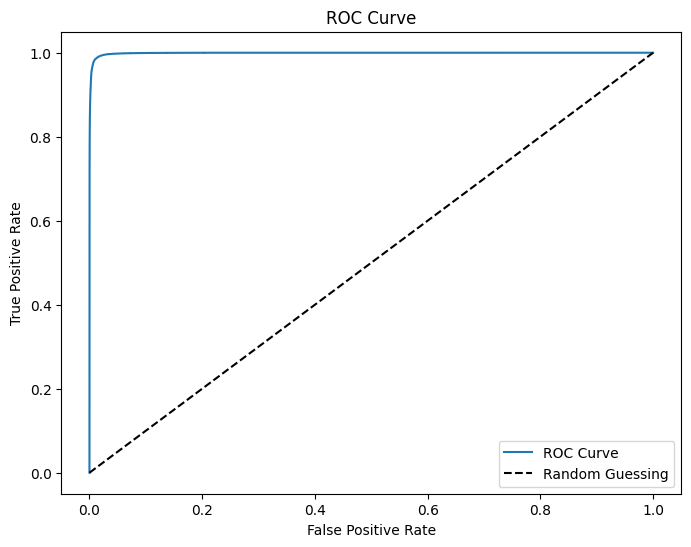

AUC Score: 0.9990856584337022


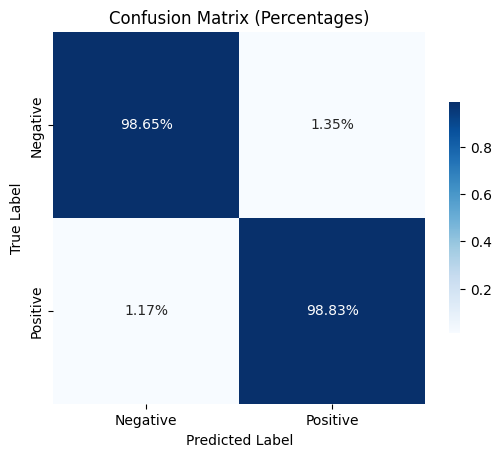

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    roc_auc_score
)
import seaborn as sns
import numpy as np
# Example of converting data types if needed
X_test = X_test.astype('float32')


# Evaluate the model on the test set
test_results = vgg16_model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = vgg16_model.predict(X_test)

# Convert predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print("Testing Accuracy:", test_results[1])
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plot training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(vgg16_history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test set
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix with percentage and percentage sign color bar
plt.figure(figsize=(6, 6))  # Adjust the figure size

# Use cbar_kws to adjust the color bar size
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis],
            annot=True, fmt=".2%", cmap="Blues", square=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            cbar_kws={"shrink": 0.5})  # Adjust the shrink parameter for the color bar
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
test_loss, test_accuracy, test_auc = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = vgg16_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_vgg16_model():
    # input
    input_layer = Input(shape=(32, 1))

    # 1st Conv Block
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 2nd Conv Block
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 3rd Conv block
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 4th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    #x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 5th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    #x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dense(units=4096, activation='relu')(x)
    output_layer = Dense(units=1, activation='sigmoid')(x)  # Changed activation to 'sigmoid'

    return Model(inputs=input_layer, outputs=output_layer)

# Create the model with input size (320, 1)
vgg16_model = create_vgg16_model()
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=3000, epochs=50, verbose=1,
                                validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Plot training history
plot_training_history(vgg16_history)
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


# Evaluate on the test set
test_loss, test_accuracy, test_auc = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = vgg16_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 32, 64)            256       
                                                                 
 conv1d_14 (Conv1D)          (None, 32, 64)            12352     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 16, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 16, 128)           24704     
                                                                 
 conv1d_16 (Conv1D)          (None, 16, 128)           49280     
                                                           

NameError: name 'plot_training_history' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined before this point

def create_vgg16_model():
    # input
    input_layer = Input(shape=(128, 32))

   # 1st Conv Block
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 2nd Conv Block
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 3rd Conv block
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 4th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 5th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout
    x = Dense(units=4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Add dropout
    output_layer = Dense(units=1, activation='sigmoid')(x)

    return Model(inputs=input_layer, outputs=output_layer)


# Assuming X_train, y_train, X_test, y_test are defined before this point

# Create the model with input size (128, 32)
vgg16_model = create_vgg16_model()
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Assuming X_train, y_train, X_test, y_test are defined before this point

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=8, epochs=50, verbose=1,
                                validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])


In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
# Plot training history
plot_training_history(vgg16_history)
# Plot training history



# Evaluate on the test set
test_loss, test_accuracy, test_auc = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = vgg16_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# RESNET18

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def residual_block(X, num_filter, kernel_size, down_sample=False):

    X_shortcut = X

    if down_sample == False:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    else:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=2, padding='same')(X)
        X_shortcut = Conv1D(filters=num_filter, kernel_size=1, strides=2, padding='same')(X_shortcut)
        X_shortcut = BatchNormalization(axis=2)(X_shortcut)

    X = BatchNormalization(axis=2)(X)
    X = ReLU()(X)

    X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    X = BatchNormalization(axis=2)(X)

    X = Add()([X, X_shortcut])
    X = ReLU()(X)

    return X

def create_resnet18_model():
    input_layer = Input(shape=(32,1))
    # Conv1
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(input_layer)
    # Conv2_x
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    # Conv3_x
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=False)
    # Conv4_x
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=False)
    # Conv5_x
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=False)
    # Classifier
    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(1, activation="sigmoid")(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Create the model with input size (320, 1)
resnet18_model = create_resnet18_model()
resnet18_model.summary()

# Compile the model
resnet18_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
resnet18_history = resnet18_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, verbose=1,
                                      validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Save the trained model
model_save_path = "resnet18_model.h5"
resnet18_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Plot training history
plot_training_history(resnet18_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = resnet18_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = resnet18_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [ ]:
# Plot training history
plot_training_history(resnet18_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = resnet18_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = resnet18_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# DENSENET

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, ReLU, Concatenate, GlobalAveragePooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have X_train, y_train, X_test, y_test with the correct shape
# X_train.shape should be (number_of_samples, sequence_length, num_channels)

def dense_block(X, num_layers, growth_rate):
    for _ in range(num_layers):
        X_shortcut = X
        X = BatchNormalization(axis=2)(X)
        X = ReLU()(X)
        X = Conv1D(filters=growth_rate, kernel_size=3, strides=1, padding='same')(X)
        X = Concatenate(axis=2)([X, X_shortcut])
    return X

def transition_block(X, compression_factor):
    num_filters = int(tf.keras.backend.int_shape(X)[-1] * compression_factor)
    X = BatchNormalization(axis=2)(X)
    X = ReLU()(X)

    # Check if the input shape is too small for pooling
    if tf.keras.backend.int_shape(X)[1] >= 2:
        X = Conv1D(filters=num_filters, kernel_size=1, strides=1, padding='same')(X)
        X = tf.keras.layers.AveragePooling1D(pool_size=2, strides=2)(X)
    else:
        # If the input shape is too small, just use a 1x1 convolution without pooling
        X = Conv1D(filters=num_filters, kernel_size=1, strides=1, padding='same')(X)

    return X

def create_densenet_model():
    input_layer = Input(shape=(32, 1))
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=6, growth_rate=32)
    x = transition_block(x, compression_factor=0.5)

    # Dense Block 2
    x = dense_block(x, num_layers=12, growth_rate=32)
    x = transition_block(x, compression_factor=0.5)

    # Dense Block 3
    x = dense_block(x, num_layers=24, growth_rate=32)
    x = transition_block(x, compression_factor=0.5)

    # Dense Block 4
    x = dense_block(x, num_layers=16, growth_rate=32)

    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(1, activation="sigmoid")(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Create the DenseNet model with input size (14, 1)
densenet_model = create_densenet_model()
densenet_model.summary()

# Compile the model
densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Assuming you have X_train, y_train, X_test, y_test with the correct shape
# Early stopping callback to stop training if the validation loss does not improve for 10 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
densenet_history = densenet_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=500, verbose=1,
                                      validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Plot training history for DenseNet
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(densenet_history)

# Evaluate on the test set for DenseNet
test_loss, test_accuracy, test_auc = densenet_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix for DenseNet
y_pred_densenet = densenet_model.predict(X_test)
y_pred_binary_densenet = np.round(y_pred_densenet)
conf_matrix_densenet = confusion_matrix(y_test, y_pred_binary_densenet)

# Plot confusion matrix for DenseNet
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix (DenseNet)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 1)]              0         []                            
                                                                                                  
 conv1d_62 (Conv1D)          (None, 16, 64)               512       ['input_2[0][0]']             
                                                                                                  
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)                0         ['conv1d_62[0][0]']           
 g1D)                                                                                             
                                                                                                  
 batch_normalization_61 (Ba  (None, 8, 64)                256       ['max_pooling1d_1[0][0]'

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, ReLU, Concatenate, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have X_train, y_train, X_test, y_test with the correct shape
# X_train.shape should be (number_of_samples, sequence_length, num_channels)

def dense_block(X, num_layers, growth_rate, dropout_rate=0.2):
    for _ in range(num_layers):
        X_shortcut = X
        X = BatchNormalization(axis=2)(X)
        X = ReLU()(X)
        X = Conv1D(filters=growth_rate, kernel_size=3, strides=1, padding='same')(X)
        X = Dropout(dropout_rate)(X)  # Add dropout layer
        X = Concatenate(axis=2)([X, X_shortcut])
    return X

def transition_block(X, compression_factor, dropout_rate=0.2):
    num_filters = int(tf.keras.backend.int_shape(X)[-1] * compression_factor)
    X = BatchNormalization(axis=2)(X)
    X = ReLU()(X)

    # Check if the input shape is too small for pooling
    if tf.keras.backend.int_shape(X)[1] >= 2:
        X = Conv1D(filters=num_filters, kernel_size=1, strides=1, padding='same')(X)
        X = Dropout(dropout_rate)(X)  # Add dropout layer
        X = tf.keras.layers.AveragePooling1D(pool_size=2, strides=2)(X)
    else:
        # If the input shape is too small, just use a 1x1 convolution without pooling
        X = Conv1D(filters=num_filters, kernel_size=1, strides=1, padding='same')(X)

    return X

def create_densenet_model(dropout_rate=0.2):
    input_layer = Input(shape=(32, 1))
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(input_layer)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=6, growth_rate=32, dropout_rate=dropout_rate)
    x = transition_block(x, compression_factor=0.5, dropout_rate=dropout_rate)

    # Dense Block 2
    x = dense_block(x, num_layers=12, growth_rate=32, dropout_rate=dropout_rate)
    x = transition_block(x, compression_factor=0.5, dropout_rate=dropout_rate)

    # Dense Block 3
    x = dense_block(x, num_layers=24, growth_rate=32, dropout_rate=dropout_rate)
    x = transition_block(x, compression_factor=0.5, dropout_rate=dropout_rate)

    # Dense Block 4
    x = dense_block(x, num_layers=16, growth_rate=32, dropout_rate=dropout_rate)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout_rate)(x)  # Add dropout layer
    output_layer = Dense(1, activation="sigmoid")(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Create the DenseNet model with input size (14, 1) and dropout rate of 0.2
densenet_model_with_dropout = create_densenet_model(dropout_rate=0.2)
densenet_model_with_dropout.summary()

# Compile the model
densenet_model_with_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                                    loss=tf.keras.losses.BinaryCrossentropy(),
                                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Assuming you have X_train, y_train, X_test, y_test with the correct shape
# Early stopping callback to stop training if the validation loss does not improve for 10 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
densenet_history_with_dropout = densenet_model_with_dropout.fit(x=X_train, y=y_train, batch_size=1000, epochs=500,
                                                                verbose=1, validation_data=(X_test, y_test),
                                                                shuffle=True, callbacks=[early_stopping])

# Plot training history for DenseNet with dropout
plot_training_history(densenet_history_with_dropout)

# Evaluate on the test set for DenseNet with dropout
test_loss_with_dropout, test_accuracy_with_dropout, test_auc_with_dropout = densenet_model_with_dropout.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss_with_dropout:.4f}')
print(f'Test Accuracy: {test_accuracy_with_dropout:.4f}')
print(f'Test AUC: {test_auc_with_dropout:.4f}')

# Generate confusion matrix for DenseNet with dropout
y_pred_densenet_with_dropout = densenet_model_with_dropout.predict(X_test)
y_pred_binary_densenet_with_dropout = np.round(y_pred_densenet_with_dropout)
conf_matrix_densenet_with_dropout = confusion_matrix(y_test, y_pred_binary_densenet_with_dropout)

# Plot confusion matrix for DenseNet with dropout
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_densenet_with_dropout, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix (DenseNet with Dropout)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Evaluate the DenseNet model on the test set
densenet_test_results = densenet_model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set using DenseNet
y_densenet_pred = densenet_model.predict(X_test)

# Convert predictions to binary values (0 or 1)
y_densenet_pred_binary = (y_densenet_pred > 0.5).astype(int)

# Calculate metrics for the DenseNet model
f1_densenet = f1_score(y_test, y_densenet_pred_binary)
precision_densenet = precision_score(y_test, y_densenet_pred_binary)
recall_densenet = recall_score(y_test, y_densenet_pred_binary)

print("DenseNet Testing Accuracy:", densenet_test_results[1])
print("DenseNet F1 Score:", f1_densenet)
print("DenseNet Precision:", precision_densenet)
print("DenseNet Recall:", recall_densenet)

# Plot training and validation loss for DenseNet
plt.figure(figsize=(8, 6))
plt.plot(densenet_history.history['loss'], label='DenseNet Training Loss')
plt.plot(densenet_history.history['val_loss'], label='DenseNet Validation Loss')
plt.title('DenseNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy for DenseNet
plt.figure(figsize=(8, 6))
plt.plot(densenet_history.history['binary_accuracy'], label='DenseNet Training Accuracy')
plt.plot(densenet_history.history['val_binary_accuracy'], label='DenseNet Validation Accuracy')
plt.title('DenseNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print classification report for DenseNet
# print("DenseNet Classification Report:")
# print(classification_report(y_test, y_densenet_pred_binary))

# # Plot ROC curve for DenseNet
# fpr_densenet, tpr_densenet, thresholds_densenet = roc_curve(y_test, y_densenet_pred)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_densenet, tpr_densenet, label='DenseNet ROC Curve')
# plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('DenseNet ROC Curve')
# plt.legend()
# plt.show()

# Calculate AUC score for DenseNet
auc_score_densenet = roc_auc_score(y_test, y_densenet_pred)
print("DenseNet AUC Score:", auc_score_densenet)

# Confusion matrix for DenseNet
conf_matrix_densenet = confusion_matrix(y_test, y_densenet_pred_binary)

# Plot confusion matrix with percentage and percentage sign color bar
plt.figure(figsize=(6, 6))  # Adjust the figure size

# Use cbar_kws to adjust the color bar size
sns.heatmap(conf_matrix_densenet / conf_matrix_densenet.sum(axis=1)[:, np.newaxis],
            annot=True, fmt=".2%", cmap="Blues", square=True,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            cbar_kws={"shrink": 0.5})  # Adjust the shrink parameter for the color bar
plt.title('DenseNet Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# INCEPTION (error)

In [ ]:
def inception_module(x,filters_1x1,filters_3x3_reduce,filters_3x3, filters_5x5_reduce,filters_5x5,filters_pool_proj):
    # branch 1x1
    conv_1x1 = Conv1D(filters_1x1, kernel_size=1, padding="same", activation="relu")(x)
    # branch 3x3
    conv_3x3 = Conv1D(filters_3x3_reduce, kernel_size=1, padding="same", activation="relu")(x)
    conv_3x3 = Conv1D(filters_3x3, kernel_size=3, padding="same", activation="relu")(conv_3x3)
    # branch 5x5
    conv_5x5 = Conv1D(filters_5x5_reduce, kernel_size=1, padding="same", activation="relu")(x)
    conv_5x5 = Conv1D(filters_5x5, kernel_size=5, padding="same", activation="relu")(conv_5x5)
    # brance pool
    pool_proj = MaxPooling1D(pool_size = 3, strides=1, padding="same")(x)
    pool_proj = Conv1D(filters_pool_proj, kernel_size=1, padding="same", activation="relu")(pool_proj)
    # channel concat
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=2)

    return output

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout, concatenate, GlobalAveragePooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import numpy as np

def create_inception_v1_model():
    # input
    input_layer = Input(shape=(187, 1))
    x = Conv1D(filters= 64, kernel_size= 7, padding="same", strides=2, activation="relu")(input_layer)
    x = MaxPooling1D(pool_size = 3, padding="same", strides= 2)(x)
    x = Conv1D(filters= 64, kernel_size= 1, padding="same", strides=1, activation="relu")(x)
    x = Conv1D(filters=192, kernel_size= 3, padding="same", strides=1, activation="relu")(x)
    x = MaxPooling1D(pool_size = 3, padding="same", strides= 2)(x)

    # Inception module 3a
    x = inception_module(x,filters_1x1=64,filters_3x3_reduce=96,filters_3x3=128,filters_5x5_reduce=16,filters_5x5=32,filters_pool_proj=32)

    # Inception module 3b
    x = inception_module(x,filters_1x1=128,filters_3x3_reduce=128,filters_3x3=192,filters_5x5_reduce=32,filters_5x5=96,filters_pool_proj=64)

    # Max pool
    x = MaxPooling1D(pool_size = 3, padding="same", strides=2)(x)

    # Inception module 4a
    x = inception_module(x,filters_1x1=192,filters_3x3_reduce=96,filters_3x3=208,filters_5x5_reduce=16,filters_5x5=48,filters_pool_proj=64)

    # Output 1
    x1 = AveragePooling1D(pool_size=5, strides=3)(x)
    x1 = Conv1D(filters=128, kernel_size=1, padding="same", activation="relu")(x1)
    x1 = Flatten()(x1)
    x1 = Dense(1024, activation="relu")(x1)
    x1 = Dropout(0.7)(x1)
    output1 = Dense(1, activation='sigmoid')(x1)

    # Output 2
    x2 = AveragePooling1D(pool_size=5, strides=3)(x)
    x2 = Conv1D(filters=128, kernel_size=1, padding="same", activation="relu")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(1024, activation="relu")(x2)
    x2 = Dropout(0.7)(x2)
    output2 = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=input_layer, outputs=[output1, output2])
    return model

# Create the Inception V1 model
inception_v1_model = create_inception_v1_model()

# Compile the model
optimizer = Adam(lr=0.001)
inception_v1_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Mock data for illustration, replace with your actual data
X_train = np.random.rand(100, 187, 1)
y_train = np.random.randint(2, size=(100,))

X_val = np.random.rand(20, 187, 1)
y_val = np.random.randint(2, size=(20,))

X_test = np.random.rand(30, 187, 1)
y_test = np.random.randint(2, size=(30,))

# Define callbacks
checkpoint = ModelCheckpoint('inception_v1_model.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = inception_v1_model.fit(X_train, [y_train, y_train],
                                  epochs=50,
                                  batch_size=32,
                                  validation_data=(X_val, [y_val, y_val]),
                                  callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test set
test_accuracy = inception_v1_model.evaluate(X_test, [y_test, y_test])[1]
print("Test Accuracy:", test_accuracy)


# EXTRA

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_vgg16_model():
    # input
    input_layer = Input(shape=(32, 1))

    # 1st Conv Block
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 2nd Conv Block
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 3rd Conv block
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 4th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # 5th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dense(units=4096, activation='relu')(x)
    output_layer = Dense(units=1, activation='sigmoid')(x)  # Changed activation to 'sigmoid'

    return Model(inputs=input_layer, outputs=output_layer)

# Create the model with input size (320, 1)
vgg16_model = create_vgg16_model()
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, verbose=1,
                                validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Save the trained model
vgg16_model.save("/content/drive/MyDrive/Sam40/Raw Data/models/vgg16_airthmetic.h5")

# Plot training history
plot_training_history(vgg16_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = vgg16_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 conv1d_32 (Conv1D)          (None, 32, 64)            256       
                                                                 
 conv1d_33 (Conv1D)          (None, 32, 64)            12352     
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 16, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_34 (Conv1D)          (None, 16, 128)           24704     
                                                                 
 conv1d_35 (Conv1D)          (None, 16, 128)           49280     
                                                           

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 32, 1), found shape=(None, 14)


In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

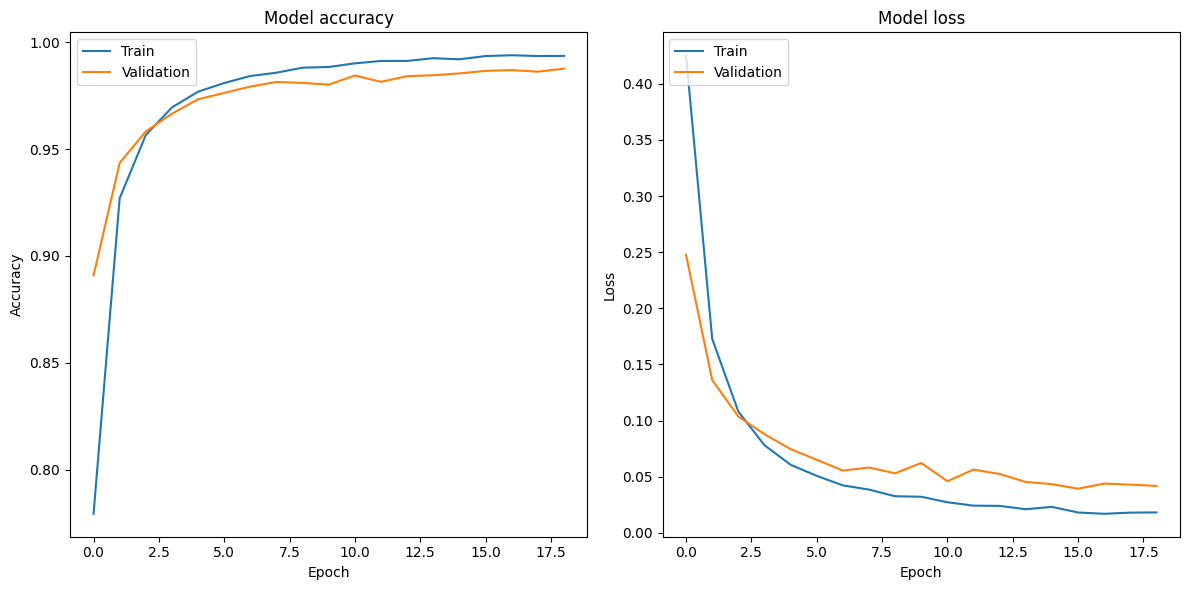

Test Loss: 0.0393
Test Accuracy: 0.9867
Test AUC: 0.9983
4800/4800 [==============================] - 17s 3ms/step


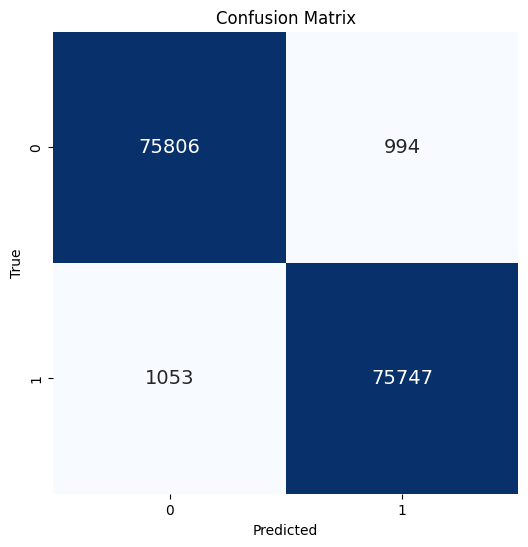

In [ ]:
plot_training_history(vgg16_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = vgg16_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = vgg16_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the VGG-15 model
def create_vgg15_model(input_shape):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv1D(64, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2, strides=2))

    # Block 2
    model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2, strides=2))

    # Block 3
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2, strides=2))

    # Block 4
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2, strides=2))

    # Block 5
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(2, strides=2))

    # Flatten and dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))  # Assuming regression task

    return model

# Create the VGG-15 model
input_shape = (256, 32)
vgg15_model = create_vgg15_model(input_shape)

# Compile the model
vgg15_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
vgg15_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)


Epoch 1/10
75/75 - 15s - loss: 1220.4224 - mae: 3.7539 - val_loss: 0.2614 - val_mae: 0.5066 - 15s/epoch - 198ms/step
Epoch 2/10
75/75 - 2s - loss: 0.2471 - mae: 0.4895 - val_loss: 0.2391 - val_mae: 0.4849 - 2s/epoch - 23ms/step
Epoch 3/10
75/75 - 2s - loss: 0.2436 - mae: 0.4836 - val_loss: 0.2357 - val_mae: 0.4794 - 2s/epoch - 23ms/step
Epoch 4/10
75/75 - 2s - loss: 0.2404 - mae: 0.4804 - val_loss: 0.2341 - val_mae: 0.4693 - 2s/epoch - 24ms/step
Epoch 5/10
75/75 - 2s - loss: 0.2412 - mae: 0.4746 - val_loss: 0.2456 - val_mae: 0.4865 - 2s/epoch - 23ms/step
Epoch 6/10
75/75 - 2s - loss: 0.2434 - mae: 0.4801 - val_loss: 0.2335 - val_mae: 0.4718 - 2s/epoch - 24ms/step
Epoch 7/10
75/75 - 2s - loss: 0.2350 - mae: 0.4688 - val_loss: 0.2313 - val_mae: 0.4685 - 2s/epoch - 24ms/step
Epoch 8/10
75/75 - 2s - loss: 0.2330 - mae: 0.4627 - val_loss: 0.2620 - val_mae: 0.4594 - 2s/epoch - 24ms/step
Epoch 9/10
75/75 - 2s - loss: 0.2282 - mae: 0.4532 - val_loss: 0.2305 - val_mae: 0.4513 - 2s/epoch - 24ms/

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sam40/Raw Data/Arithmetic_combined.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,86.193026,-273.187031,-402.933805,-271.556521,111.434735,19.893705,13.963880,20.593680,13.259276,-2.044488,...,18.536154,11.418089,-3.978692,-1.986124,12.908904,23.449082,30.991623,111.401968,-28.657760,-901.189762
1,89.063580,-287.814680,-420.139618,-285.146547,109.713191,18.746734,15.223366,19.621657,14.021797,4.046700,...,23.816343,17.788561,6.461726,6.490896,16.848083,21.888709,28.355180,108.875399,-35.728222,-932.454164
2,89.201398,-303.291316,-441.412067,-303.289853,103.470425,17.820471,15.398429,17.142959,8.357753,5.374654,...,25.036703,17.756136,9.426649,9.060580,18.587718,16.831567,20.744673,102.867666,-43.201459,-963.328677
3,81.039690,-323.465688,-463.277986,-320.902688,93.062249,8.449375,6.922635,13.612849,8.203022,5.691301,...,16.785470,10.741721,1.352036,0.386200,9.684251,9.159395,10.829071,92.913853,-57.254038,-993.806401
4,72.856871,-345.039721,-485.297702,-338.776031,81.888704,-2.785932,-1.910618,6.529390,0.129632,-1.984368,...,4.312288,-1.418033,-9.495602,-10.387285,-0.586225,0.367818,3.397099,81.652636,-75.025094,-1025.241719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383995,-15.636260,-11.947571,-23.592399,-30.904976,-17.427876,-20.313218,-14.538173,-11.965843,-25.117634,-40.855374,...,-20.738272,-12.609502,-8.054637,-4.226780,-2.060773,0.964150,-11.364010,-8.502495,-12.421009,-46.656411
383996,-19.104316,-12.857778,-17.830961,-27.727038,-17.015238,-23.205739,-14.289437,-11.748953,-17.232253,-30.612277,...,-16.223863,-7.107881,-0.200956,3.081491,3.708409,5.310483,-7.371284,-3.019619,-5.470480,-42.965053
383997,-13.442507,-8.263425,-12.133833,-23.425201,-13.734091,-20.708819,-14.084862,-11.166347,-14.638844,-25.868433,...,-2.668079,0.305732,7.030102,9.738409,11.081931,11.745612,-0.001319,3.511665,1.282816,-36.284044
383998,-6.820296,-5.488700,-13.966008,-24.045820,-12.842116,-16.062704,-11.377502,-9.193775,-17.946887,-29.911752,...,-1.435872,-3.061167,3.305182,8.952891,12.798058,11.792415,1.872265,4.854790,-0.811610,-34.315627


In [ ]:
import pandas as pd
import numpy as np

def load_eeg_data(csv_path):
    # Load EEG data from CSV file
    eeg_data = pd.read_csv(csv_path)
    eeg_data = eeg_data.loc[:, ~eeg_data.columns.str.contains('Unnamed')]  # Remove columns with 'Unnamed' in the name
    return eeg_data

def segment_eeg_data(eeg_data, segment_duration_sec, overlap_sec, sampling_frequency):
    segment_duration_points = int(segment_duration_sec * sampling_frequency)
    overlap_points = int(overlap_sec * sampling_frequency)

    num_channels = eeg_data.shape[1]

    all_segments = []
    for channel in range(num_channels):
        channel_data = eeg_data.iloc[:, channel].values  # Convert to numpy array
        segments = []
        for i in range(0, len(channel_data) - segment_duration_points + 1, overlap_points):
            segment = channel_data[i:i + segment_duration_points]
            segments.append(segment)
        all_segments.append(segments)

    return np.moveaxis(np.array(all_segments), 0, 1)

# Example Usage:
csv_path = '/content/drive/MyDrive/Sam40/Raw Data/Arithmetic/Arithmetic_sub_1.csv'
eeg_data = load_eeg_data(csv_path)

segment_duration_sec = 1
overlap_sec = 0.5
sampling_frequency = 128

all_channel_segments = segment_eeg_data(eeg_data, segment_duration_sec, overlap_sec, sampling_frequency)

#Now, all_channel_segments is a 3D array containing segmented EEG data with dimensions: (segments, channels, length of each segment)


In [ ]:
all_channel_segments.shape


(149, 32, 128)

In [ ]:
import os
import numpy as np

# Assuming you have functions like load_eeg_data and segment_eeg_data defined elsewhere

def process_folder(folder_path, segment_duration_sec, overlap_sec, sampling_frequency):
    all_channel_segments_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            csv_path = os.path.join(folder_path, filename)
            eeg_data = load_eeg_data(csv_path)
            channel_segments = segment_eeg_data(eeg_data, segment_duration_sec, overlap_sec, sampling_frequency)
            all_channel_segments_list.append(channel_segments)

    final_data = np.array(all_channel_segments_list)

    return final_data

# Example Usage:
folder_path = '/content/drive/MyDrive/Sam40/Raw Data/Arithmetic'
segment_duration_sec = 1
overlap_sec = 0.5
sampling_frequency = 128

ayush2 = process_folder(folder_path, segment_duration_sec, overlap_sec, sampling_frequency)

# Accessing the shape of the 1st dataframe
shape_of_first_dataframe = ayush2.shape
print(shape_of_first_dataframe)


(40, 149, 32, 128)


In [ ]:
import os
import numpy as np

# Assuming you have functions like load_eeg_data and segment_eeg_data defined elsewhere

def process_folder(folder_path, segment_duration_sec, overlap_sec, sampling_frequency):
    all_channel_segments_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            csv_path = os.path.join(folder_path, filename)
            eeg_data = load_eeg_data(csv_path)
            channel_segments = segment_eeg_data(eeg_data, segment_duration_sec, overlap_sec, sampling_frequency)
            all_channel_segments_list.append(channel_segments)

    final_data = np.array(all_channel_segments_list)

    return final_data

# Example Usage:
folder_path = '/content/drive/MyDrive/Sam40/Raw Data/Relax'
segment_duration_sec = 1
overlap_sec = 0.5
sampling_frequency = 128

ayush1 = process_folder(folder_path, segment_duration_sec, overlap_sec, sampling_frequency)

# Accessing the shape of the 1st dataframe
shape_of_first_dataframe = ayush1.shape
print(shape_of_first_dataframe)


(40, 149, 32, 128)


In [ ]:
# Assuming you have functions like load_eeg_data and segment_eeg_data defined elsewhere

def process_folder(folder_path, segment_duration_sec, overlap_sec, sampling_frequency):
    all_channel_segments_list = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            csv_path = os.path.join(folder_path, filename)
            eeg_data = load_eeg_data(csv_path)
            channel_segments = segment_eeg_data(eeg_data, segment_duration_sec, overlap_sec, sampling_frequency)
            all_channel_segments_list.append(channel_segments)

    final_data = np.array(all_channel_segments_list)

    return final_data

# Example Usage:
folder_path1 = '/content/drive/MyDrive/Sam40/Raw Data/Relax'
folder_path2 = '/content/drive/MyDrive/Sam40/Raw Data/Arithmetic'  # Change this to the path of your second folder

segment_duration_sec = 1
overlap_sec = 0.5
sampling_frequency = 128

final_data1 = process_folder(folder_path1, segment_duration_sec, overlap_sec, sampling_frequency)
final_data2 = process_folder(folder_path2, segment_duration_sec, overlap_sec, sampling_frequency)

# Accessing the shape of each individual dataset
shape_of_final_data1 = final_data1.shape
shape_of_final_data2 = final_data2.shape

# Concatenate the two data sets along the first axis
data_list = np.concatenate((final_data1, final_data2), axis=0)

# Accessing the shape of the combined data
shape_of_combined_data = data_list.shape

# Print shapes
print("Shape of final_data1:", shape_of_final_data1)
print("Shape of final_data2:", shape_of_final_data2)
print("Shape of combined data:", shape_of_combined_data)


Shape of final_data1: (40, 149, 32, 128)
Shape of final_data2: (40, 149, 32, 128)
Shape of combined data: (80, 149, 32, 128)


In [ ]:
control_epochs_labels=[len(i)*[0] for i in ayush1]
patients_epochs_labels=[len(i)*[1] for i in ayush2]
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))


80 80


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
data_array = np.moveaxis(data_array, 1, 2)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    data_array, label_array, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (7152, 128, 32) y_train shape: (7152,)
X_val shape: (2384, 128, 32) y_val shape: (2384,)
X_test shape: (2384, 128, 32) y_test shape: (2384,)


In [ ]:
print("Number of samples in data_array:", data_array.shape[0])
print("Number of samples in label_array:", label_array.shape[0])

Number of samples in data_array: 5840
Number of samples in label_array: 5760


In [ ]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
#group_array=np.hstack(groups_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape,group_array.shape)

(5840, 384, 32) (5760,) (5840,)


In [ ]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    data_array, label_array, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are defined before this point

def create_vgg16_model():
    # input
    input_layer = Input(shape=(128, 32))

    # 1st Conv Block
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # 2nd Conv Block
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # 3rd Conv block
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # 4th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # 5th Conv block
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(units=4096, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout here
    x = Dense(units=4096, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout here
    output_layer = Dense(units=1, activation='sigmoid')(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Assuming X_train, y_train, X_test, y_test are defined before this point

# Create the model with input size (32, 1)
vgg16_model = create_vgg16_model()
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Assuming X_train, y_train, X_test, y_test are defined before this point

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=8, epochs=50, verbose=1,
                                validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 32)]         0         
                                                                 
 conv1d_13 (Conv1D)          (None, 128, 64)           6208      
                                                                 
 conv1d_14 (Conv1D)          (None, 128, 64)           12352     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 64, 64)            0         
 g1D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64)            256       
 chNormalization)                                                
                                                                 
 conv1d_15 (Conv1D)          (None, 64, 128)           2470

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def residual_block(X, num_filter, kernel_size, down_sample=False):

    X_shortcut = X

    if down_sample == False:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    else:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=2, padding='same')(X)
        X_shortcut = Conv1D(filters=num_filter, kernel_size=1, strides=2, padding='same')(X_shortcut)
        X_shortcut = BatchNormalization(axis=2)(X_shortcut)

    X = BatchNormalization(axis=2)(X)
    X = ReLU()(X)

    X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    X = BatchNormalization(axis=2)(X)

    X = Add()([X, X_shortcut])
    X = ReLU()(X)

    return X

def create_resnet18_model():
    input_layer = Input(shape=(512, 32))
    # Conv1
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(input_layer)
    # Conv2_x
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    # Conv3_x
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=False)
    # Conv4_x
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=False)
    # Conv5_x
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=False)
    # Classifier
    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(1, activation="sigmoid")(x)

    return Model(inputs=input_layer, outputs=output_layer)

# Create the model with input size (320, 1)
resnet18_model = create_resnet18_model()
resnet18_model.summary()

# Compile the model
resnet18_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
resnet18_history = resnet18_model.fit(x=X_train, y=y_train, batch_size=16, epochs=50, verbose=1,
                                      validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping])

# Save the trained model
model_save_path = "resnet18_model.h5"
resnet18_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Plot training history



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 32)]            0         []                            
                                                                                                  
 conv1d_44 (Conv1D)          (None, 256, 64)              14400     ['input_4[0][0]']             
                                                                                                  
 max_pooling1d_17 (MaxPooli  (None, 128, 64)              0         ['conv1d_44[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 conv1d_45 (Conv1D)          (None, 128, 64)              12352     ['max_pooling1d_17[0][0]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to resnet18_model.h5


NameError: name 'plot_training_history' is not defined

In [ ]:
plot_training_history(resnet18_history)

# Evaluate on the test set
test_loss, test_accuracy, test_auc = resnet18_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')

# Generate confusion matrix
y_pred = resnet18_model.predict(X_test)
y_pred_binary = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['RESENET', 'VGG16', 'DENSENET']
axs[1, 0].legend()

# Plot 4: Recall for each model
for i, model in enumerate(models):
    axs[1, 1].bar(i, recall[i], bar_width, label=model, color='orange')

axs[1, 1].set_title('Recall for Each Model')
axs[1, 1].set_xticks(range(len(models)))
axs[1, 1].set_xticklabels(models)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

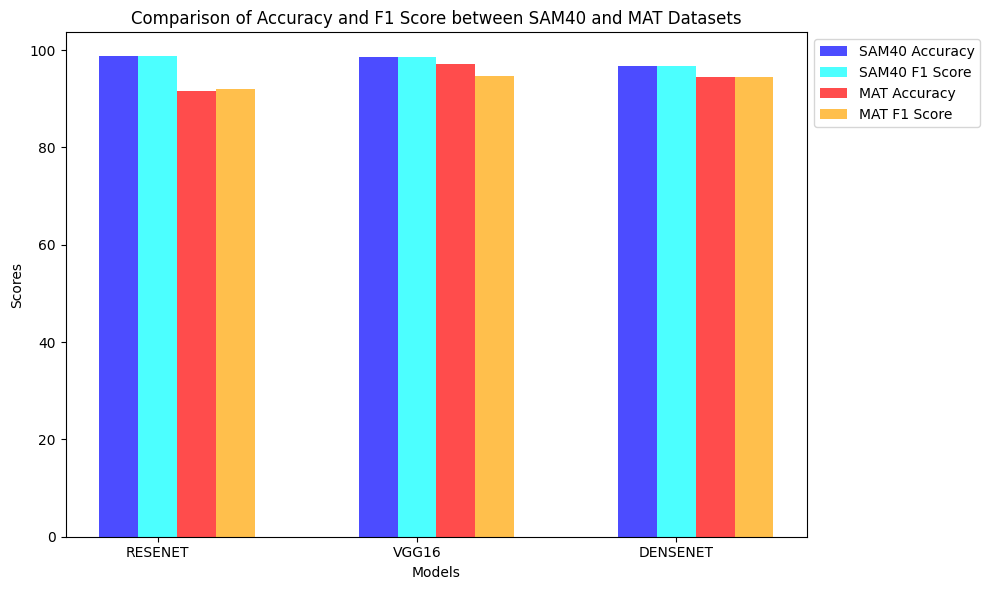

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for SAM40 dataset
sam40_models = ['RESENET', 'VGG16', 'DENSENET']
sam40_accuracy = [98.73, 98.52, 96.67]
sam40_f1 = [98.73, 98.52, 96.7]

# Data for MAT dataset
mat_models = ['VGG16', 'RESNET', 'DENSENET']
mat_accuracy = [91.54, 97.24, 94.52]
mat_f1 = [91.98, 94.69, 94.39]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(sam40_models))

# SAM40 data
rects1 = ax.bar(index - bar_width/2, sam40_accuracy, bar_width, label='SAM40 Accuracy', color='blue', alpha=0.7)
rects2 = ax.bar(index + bar_width/2, sam40_f1, bar_width, label='SAM40 F1 Score', color='cyan', alpha=0.7)

# MAT data
rects3 = ax.bar(index + 1.5*bar_width, mat_accuracy, bar_width, label='MAT Accuracy', color='red', alpha=0.7)
rects4 = ax.bar(index + 2.5*bar_width, mat_f1, bar_width, label='MAT F1 Score', color='orange', alpha=0.7)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy and F1 Score between SAM40 and MAT Datasets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sam40_models)

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
